# Predicting Car Fuel Efficiency

# 1. Problem Definition

## Objective:
The primary objective of this project is to predict the fuel efficiency (mpg) of a car based on various features. This prediction will assist in understanding the factors that influence a vehicle's fuel efficiency and contribute to the development of a robust machine learning model.

## Data Dictionary:

### mpg: 
* Column Position: #1
* Attribute Name: mpg
* Description: fuel efficiency measured in miles per gallon (mpg)
* Examples: 9.0, 13.0, 41.5
* Attribute Type: continuous

### cylinders: 
* Column Position: #2
* Attribute Name: cylinders
* Description: number of cylinders in the engine
* Examples: 3, 4, 8
* Attribute Type: multi-valued discrete

### displacement: 
* Column Position: #3
* Attribute Name: displacement
* Description: engine displacement (in cubic inches)
* Examples: 68.0, 112.0, 455.0
* Attribute Type: continuous

### horsepower:
* Column Position: #4
* Attribute Name: horsepower
* Description: engine horsepower
* Examples: 46.0, 70.0, 230.0
* Attribute Type: continuous

### weight:
* Column Position: #5
* Attribute Name: weight
* Description: vehicle weight (in pounds)
* Examples: 1613, 3615, 5140
* Attribute Type: continuous

### acceleration:
* Column Position: #6
* Attribute Name: acceleration
* Description: time to accelerate from O to 60 mph (in seconds)
* Examples: 8.00, 15.50, 24.80
* Attribute Type: continuous

### model year:
* Column Position: #7
* Attribute Name: model year
* Description: model year
* Examples: 73, 79, 82
* Attribute Type: multi-valued discrete

### origin:
* Column Position: #8
* Attribute Name: origin
* Description: origin of car (1: American, 2: European, 3: Japanese)
* Examples: 1, 2, 3
* Attribute Type: multi-valued discrete

### car name:
* Column Position: #9
* Attribute Name: car name
* Description: car name
* Examples: audi fox, ford torino
* Attribute Type: string (unique for each instance) (ID)

# 2. Data Collection

## Importing Libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
lazypredict.Supervised.REGRESSORS = lazypredict.Supervised.REGRESSORS[:41]
import sklearn
import xgboost

## Loading the Dataset:

In [2]:
# Load the dataset
initial_df = pd.read_csv('auto-mpg_v2.csv')

In [3]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [4]:
initial_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.00,8,307.00,130.00,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165.00,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150.00,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150.00,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140.00,3449,10.50,70,1,ford torino


In [5]:
initial_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,398.00,398.00,392.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.49,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,75.00,2223.75,13.83,73.00,1.00
50%,23.00,4.00,148.50,93.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,126.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


# 3. Data Cleaning and Preprocessing

### Checking for missing values

In [6]:
null_counts = initial_df.isnull().sum()
non_null_counts = initial_df.notnull().sum()
null_non_null_table = pd.DataFrame({
    'Null': null_counts,
    'Non-Nul': non_null_counts,
    '% Null':round(100*(null_counts/(non_null_counts+null_counts)),2)
})
null_non_null_table

,Null,Non-Nul,% Null
mpg,0,398,0.00
cylinders,0,398,0.00
displacement,0,398,0.00
horsepower,6,392,1.51
weight,0,398,0.00
acceleration,0,398,0.00
model year,0,398,0.00
origin,0,398,0.00
car name,0,398,0.00


There is 6 missing values for horsepower. They will not be used in the scope of this project. Therefore, they removed.

In [7]:
df = initial_df.copy() #to save initial dataframe
df.dropna(subset = ['horsepower'], inplace=True)

 Check for missing values again

In [8]:
null_counts = df.isnull().sum()
non_null_counts = df.notnull().sum()
null_non_null_table = pd.DataFrame({
    'Null': null_counts,
    'Non-Nul': non_null_counts,
    '% Null':round(100*(null_counts/(non_null_counts+null_counts)),2)
})
null_non_null_table

,Null,Non-Nul,% Null
mpg,0,392,0.00
cylinders,0,392,0.00
displacement,0,392,0.00
horsepower,0,392,0.00
weight,0,392,0.00
acceleration,0,392,0.00
model year,0,392,0.00
origin,0,392,0.00
car name,0,392,0.00


We have 392 datapoints now.

### Checking outliers in the data

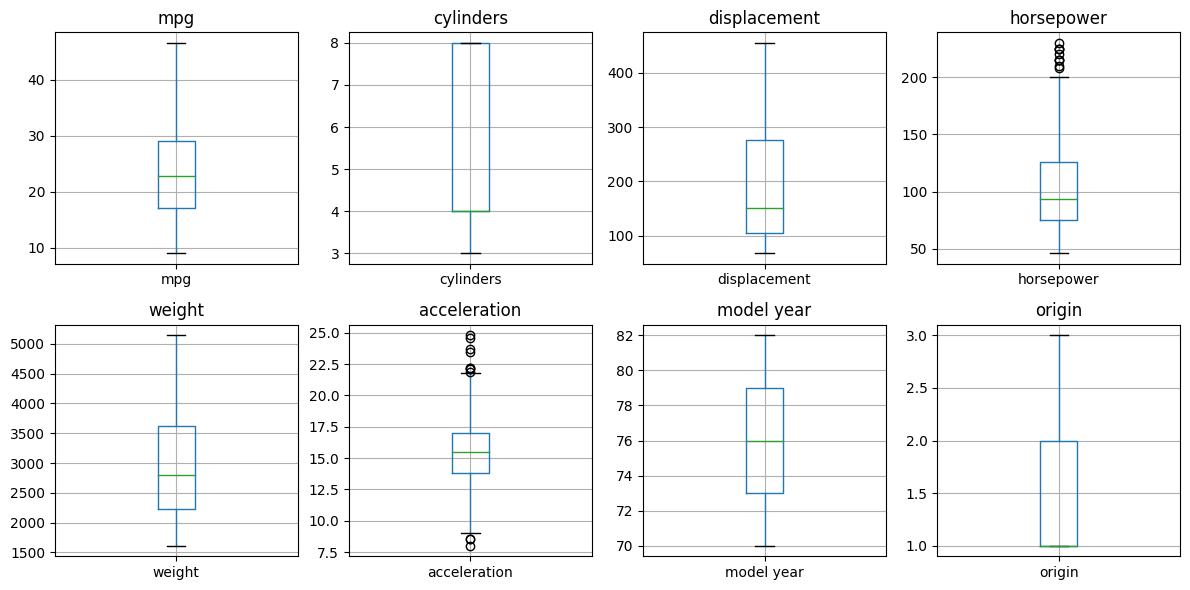

In [9]:
# Only first 8 column is numerical
numerical_cols = df.iloc[:, :8]
# Create separate boxplots for each column
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))  # 2 rows, 4 columns

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each column and create a boxplot
for i, column in enumerate(numerical_cols.columns):
    df.boxplot(column, ax=axes[i])
    axes[i].set_title(column)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

We can see outliers in horsepower and acceleration, but they are valid and maybe representative of extreme engine power. Therefore, I keep them for now.

# 4. Exploratory Data Analysis (EDA)

## Univariate Analysis:

Explore the distribution of each feature individually.

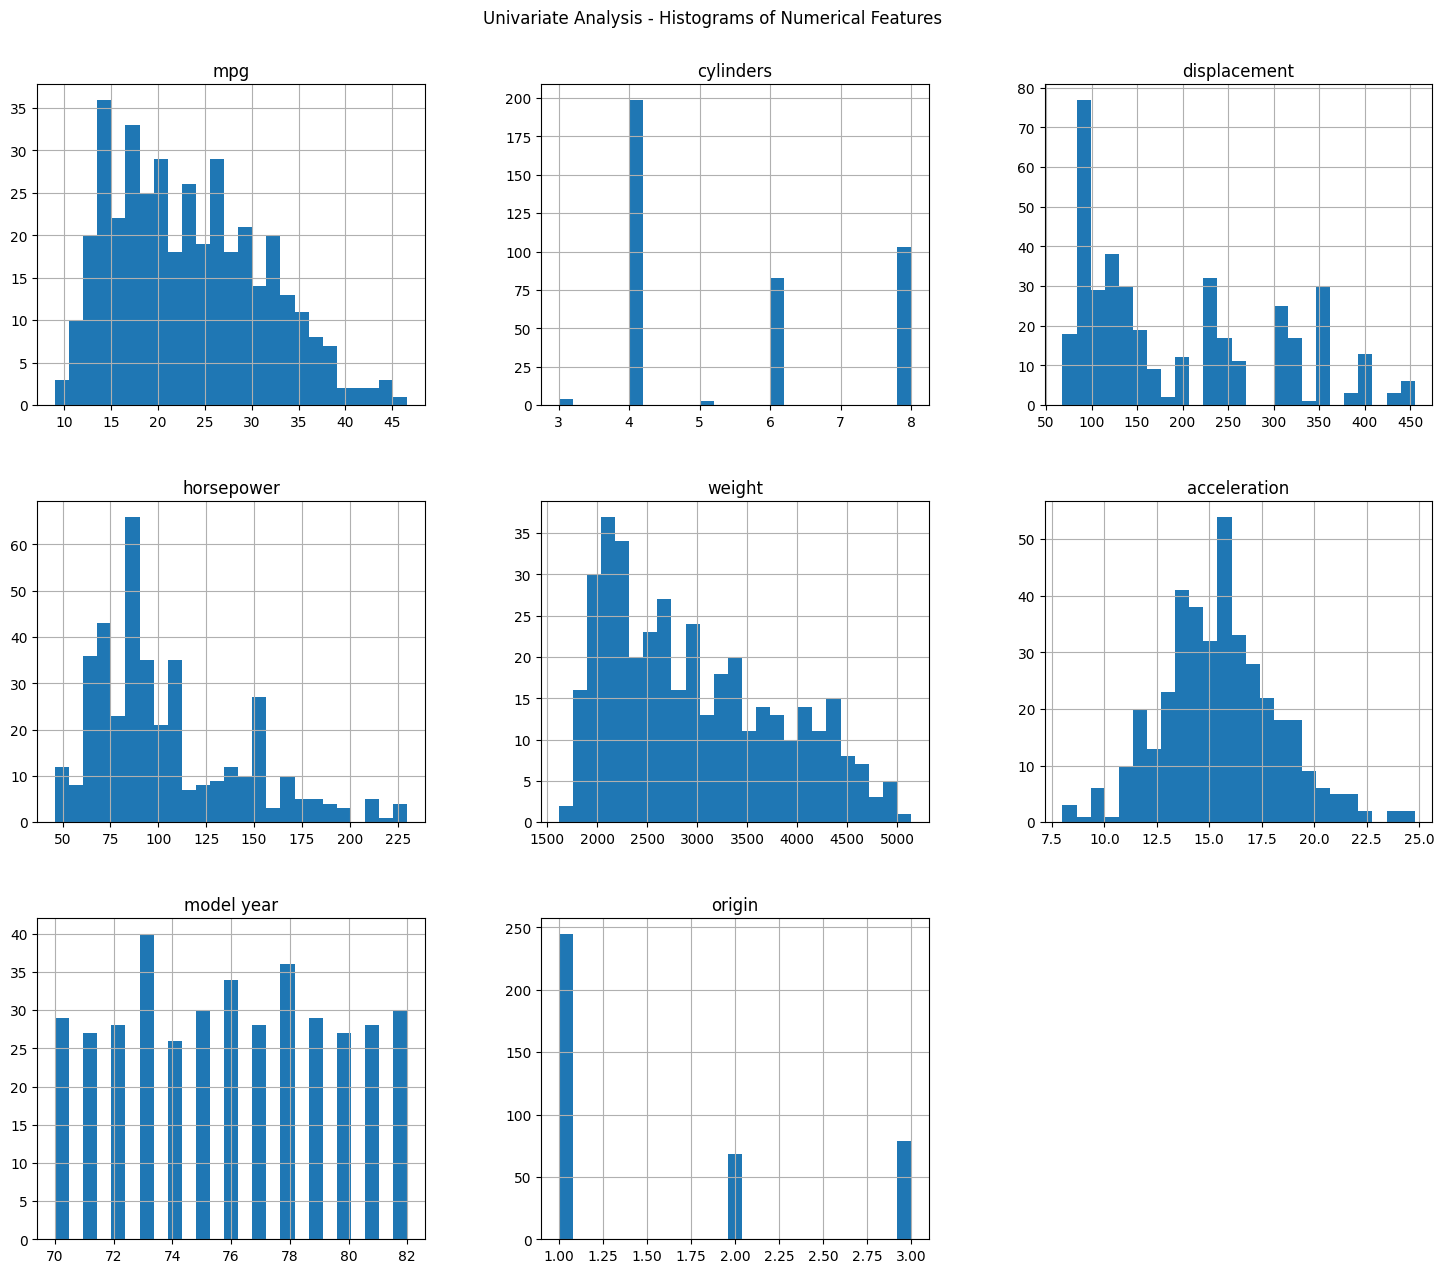

In [10]:
numerical_features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']
df[numerical_features].hist(bins=25, figsize=(18, 15))
plt.suptitle("Univariate Analysis - Histograms of Numerical Features", y=0.93)
plt.show()

## Bivariate Analysis:
Explore relationships between features and the target variable (mpg).

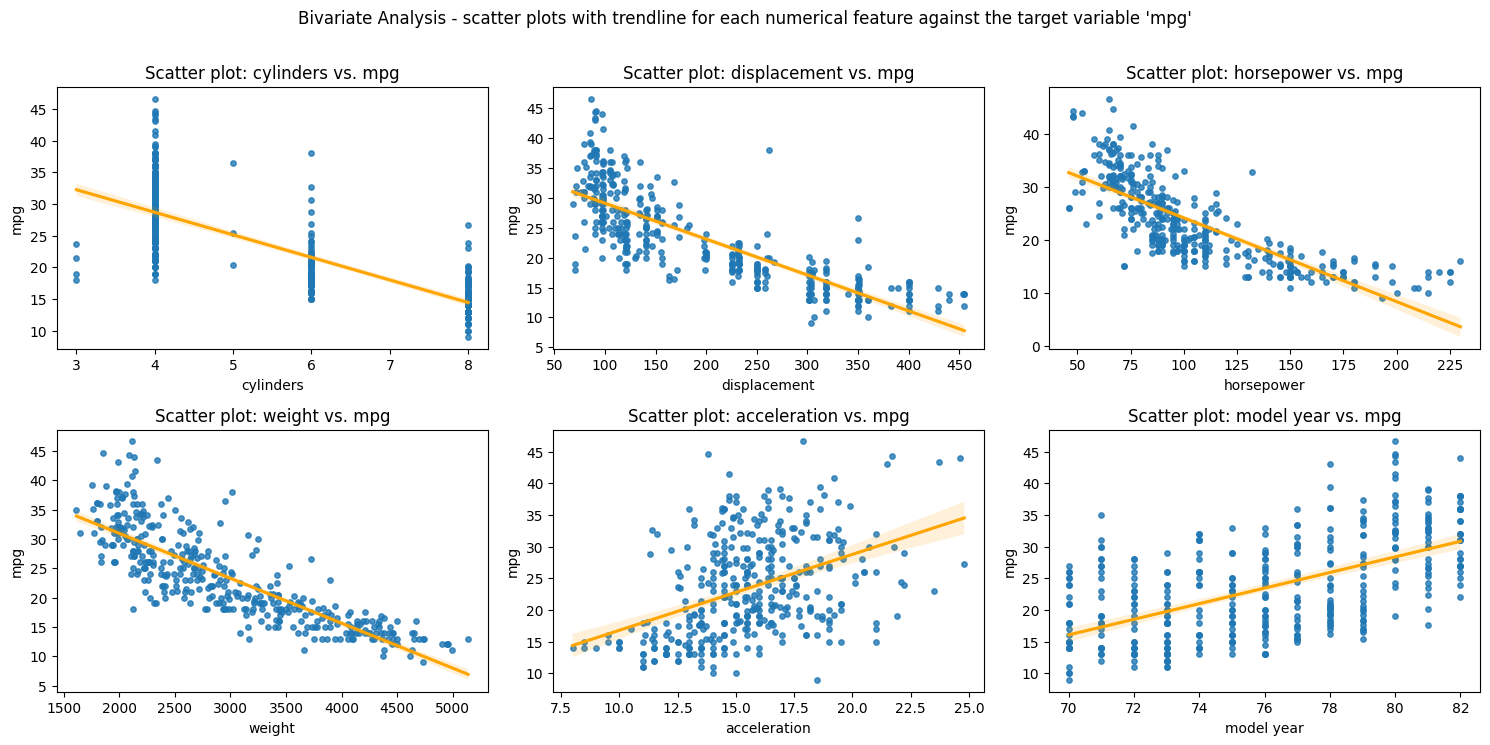

In [11]:
# Scatter plots with trendlines for numerical features against the target variable (mpg)
plt.figure(figsize=(15, 10))
numerical_features = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year']
for i, feature in enumerate(numerical_features[0:], 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=feature, y='mpg', data=df, scatter_kws={'s': 15}, line_kws={'color': 'orange'})
    plt.title(f'Scatter plot: {feature} vs. mpg')

plt.tight_layout()
plt.suptitle("Bivariate Analysis - scatter plots with trendline for each numerical feature against the target variable 'mpg'", y=1.04)
plt.show()

## Multivariate Analysis:
Investigate interactions between multiple features. Identify any patterns or correlations in the data.

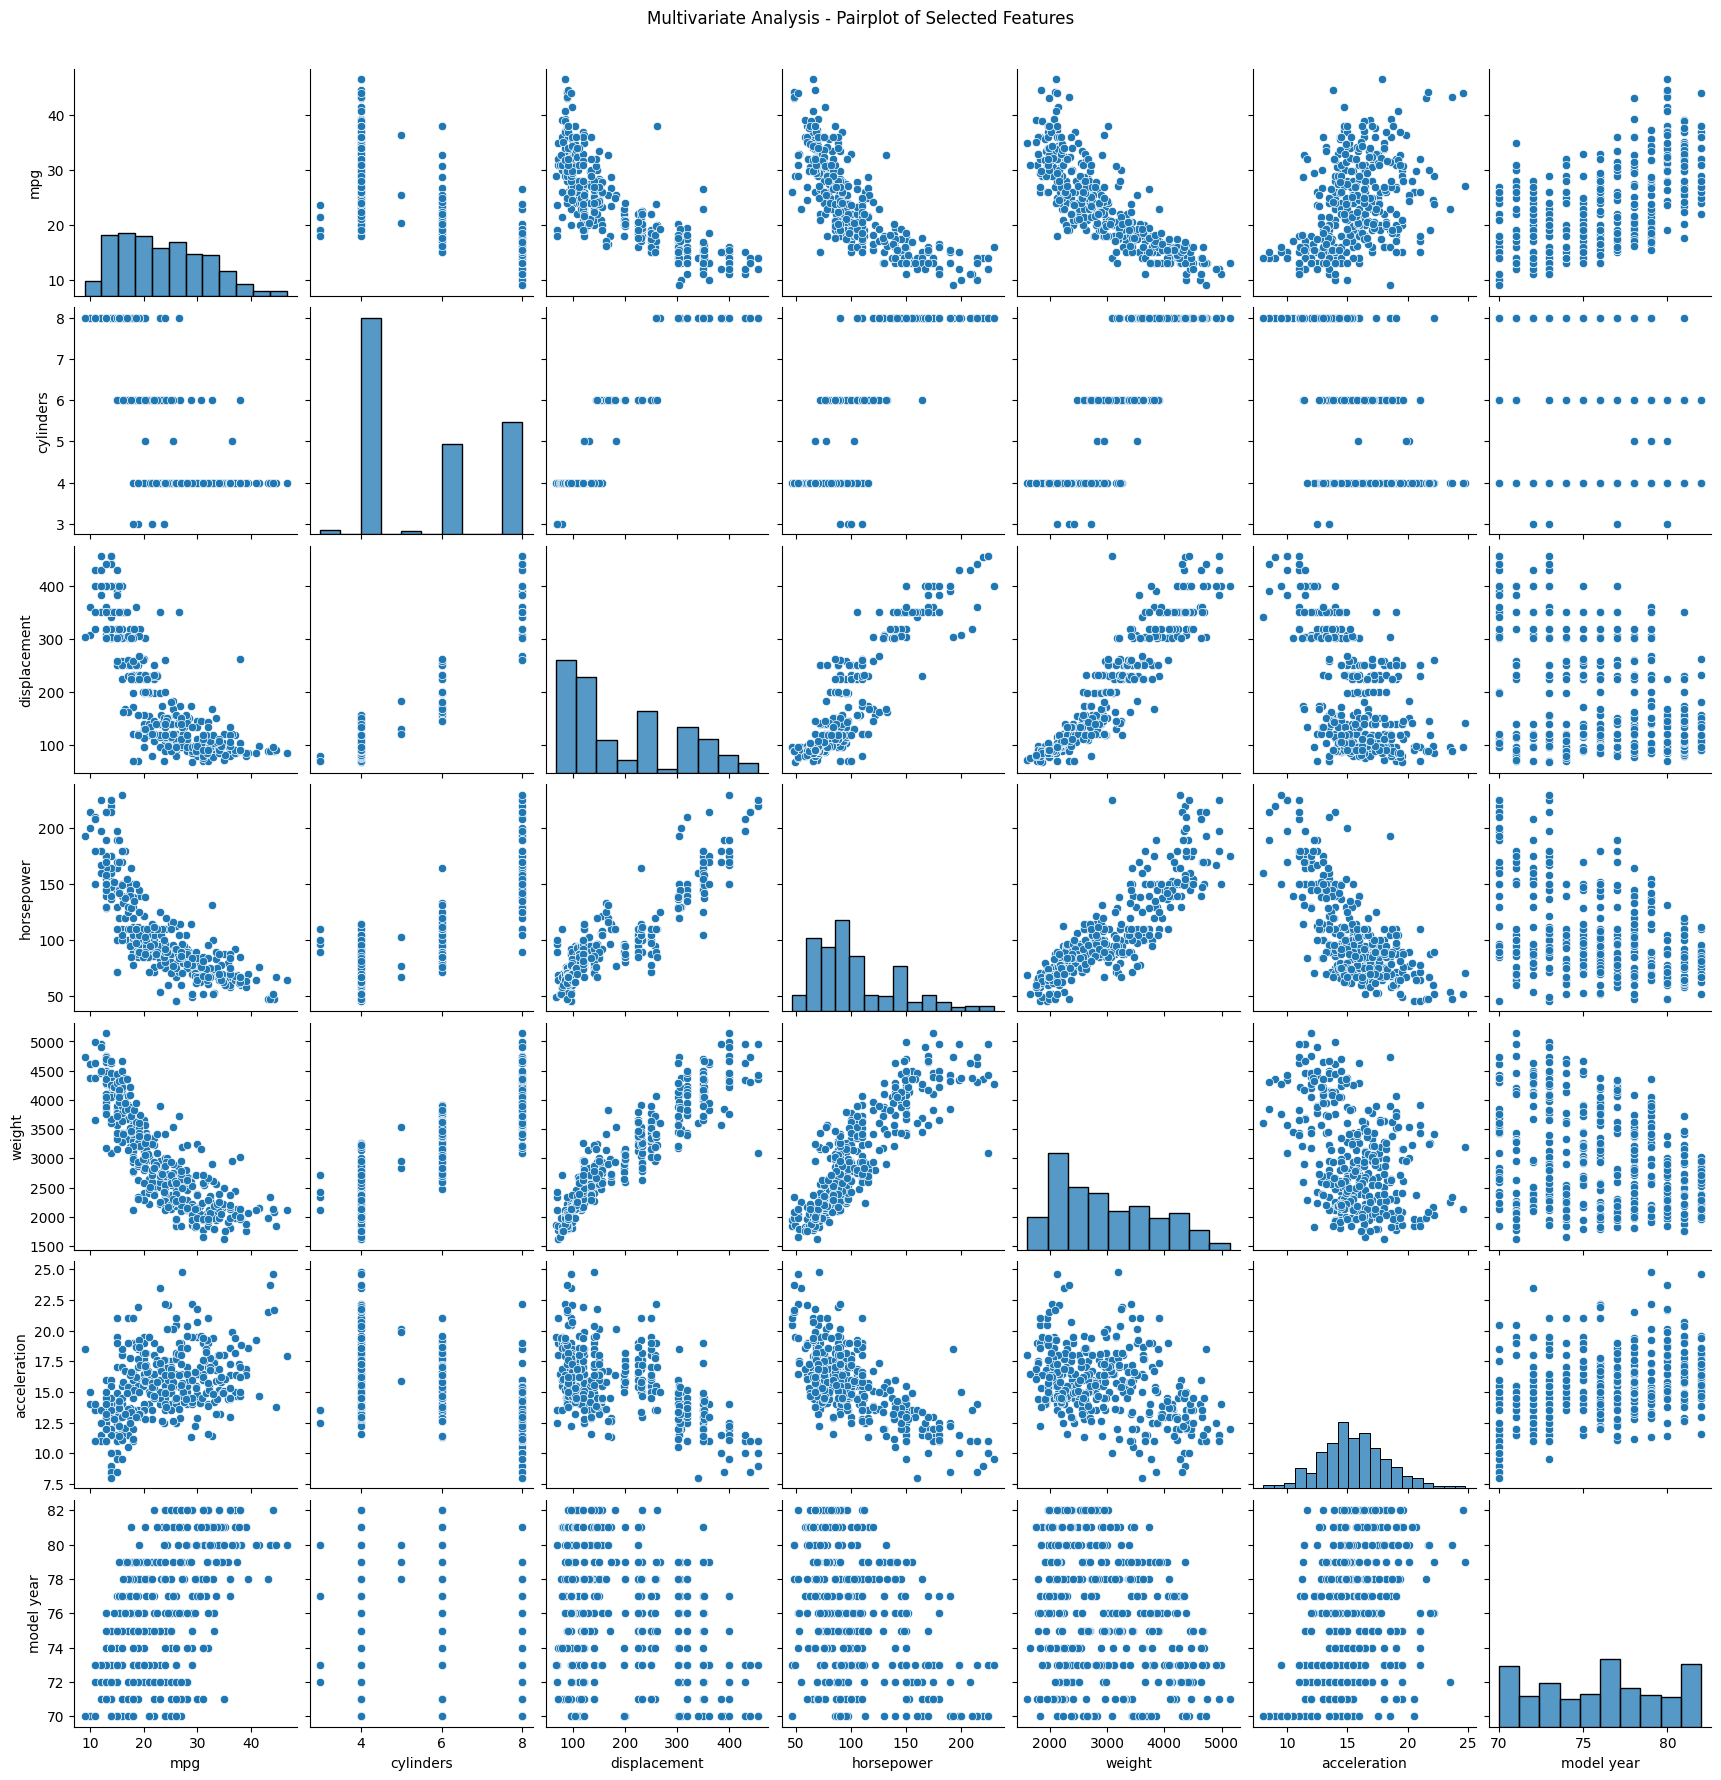

In [12]:
# Pairplot for selected features
selected_features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year']
sns.pairplot(df[selected_features])
plt.suptitle("Multivariate Analysis - Pairplot of Selected Features", y=1.02)
plt.show()

##### In summary, after these analyses, we can see that mpg have positive correlations with acceleration and model year, whereas it have negative correlations with displacement, horsepower, weight.

# 5. Feature engineering

#### combined_power_size_ratio
The following code introduces a new feature named 'combined_power_size_ratio' by multiplying the horsepower and the number of cylinders, and then dividing the result by the engine displacement. The 'combined_power_size_ratio' represents the balance between the engine's power output, cylinder count, and overall size. In the context of fuel efficiency, a higher ratio suggests that the engine is delivering more power relative to its size, potentially leading to improved efficiency. This is because a more efficient engine can generate sufficient power with less fuel consumption, contributing positively to fuel efficiency.

In [13]:
df['power_size'] = (df['horsepower'] * df['cylinders']) / df['displacement']

#### power_to_weight_ratio
The following code introduces a new feature, 'power_to_weight_ratio' by dividing the horsepower of each vehicle by its corresponding weight. The 'power_to_weight_ratio' reflects how much power a vehicle's engine produces relative to its weight. In terms of fuel efficiency, a higher power-to-weight ratio can be advantageous. Vehicles with a higher ratio can achieve better acceleration and performance with less fuel, as the engine's power is more effectively utilized in moving the vehicle's mass. This feature is particularly relevant for understanding the trade-off between power and weight in the context of fuel consumption.

In [14]:
df['power_to_weight'] = df['horsepower'] / df['weight']

#### power*weight

In [15]:
df['power*weight'] = df['horsepower'] * df['weight']

#### acceleration_efficiency
The following code introduces a new feature, 'acceleration_efficiency' by dividing the acceleration of each vehicle by its corresponding weight. This ratio quantifies the efficiency of acceleration relative to the mass of the vehicle. The 'acceleration_efficiency' feature measures how efficiently a vehicle accelerates relative to its weight. In the context of fuel efficiency, a higher acceleration efficiency suggests that the vehicle can achieve faster acceleration with less fuel consumption per unit of weight. This is important because vehicles with efficient acceleration can achieve desired speeds more quickly, potentially spending less time in lower fuel-efficient states like idling or low-speed driving.

In [16]:
df['acceleration_eff'] = df['acceleration'] / df['weight']

Let's check the last form of our data.

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,power_size,power_to_weight,power*weight,acceleration_eff
0,18.00,8,307.00,130.00,3504,12.00,70,1,chevrolet chevelle malibu,3.39,0.04,455520.00,0.00
1,15.00,8,350.00,165.00,3693,11.50,70,1,buick skylark 320,3.77,0.04,609345.00,0.00
2,18.00,8,318.00,150.00,3436,11.00,70,1,plymouth satellite,3.77,0.04,515400.00,0.00
3,16.00,8,304.00,150.00,3433,12.00,70,1,amc rebel sst,3.95,0.04,514950.00,0.00
4,17.00,8,302.00,140.00,3449,10.50,70,1,ford torino,3.71,0.04,482860.00,0.00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mpg               392 non-null    float64
 1   cylinders         392 non-null    int64  
 2   displacement      392 non-null    float64
 3   horsepower        392 non-null    float64
 4   weight            392 non-null    int64  
 5   acceleration      392 non-null    float64
 6   model year        392 non-null    int64  
 7   origin            392 non-null    int64  
 8   car name          392 non-null    object 
 9   power_size        392 non-null    float64
 10  power_to_weight   392 non-null    float64
 11  power*weight      392 non-null    float64
 12  acceleration_eff  392 non-null    float64
dtypes: float64(8), int64(4), object(1)
memory usage: 42.9+ KB


In [19]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,power_size,power_to_weight,power*weight,acceleration_eff
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98,1.58,3.11,0.03,339259.91,0.01
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81,0.63,0.01,220228.06,0.00
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00,1.73,0.02,84410.00,0.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00,1.00,2.64,0.03,173312.00,0.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00,1.00,3.03,0.03,259804.00,0.01
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00,2.00,3.56,0.04,451351.25,0.01
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00,5.28,0.07,1113975.00,0.01


In [20]:
print(df.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'power_size',
       'power_to_weight', 'power*weight', 'acceleration_eff'],
      dtype='object')


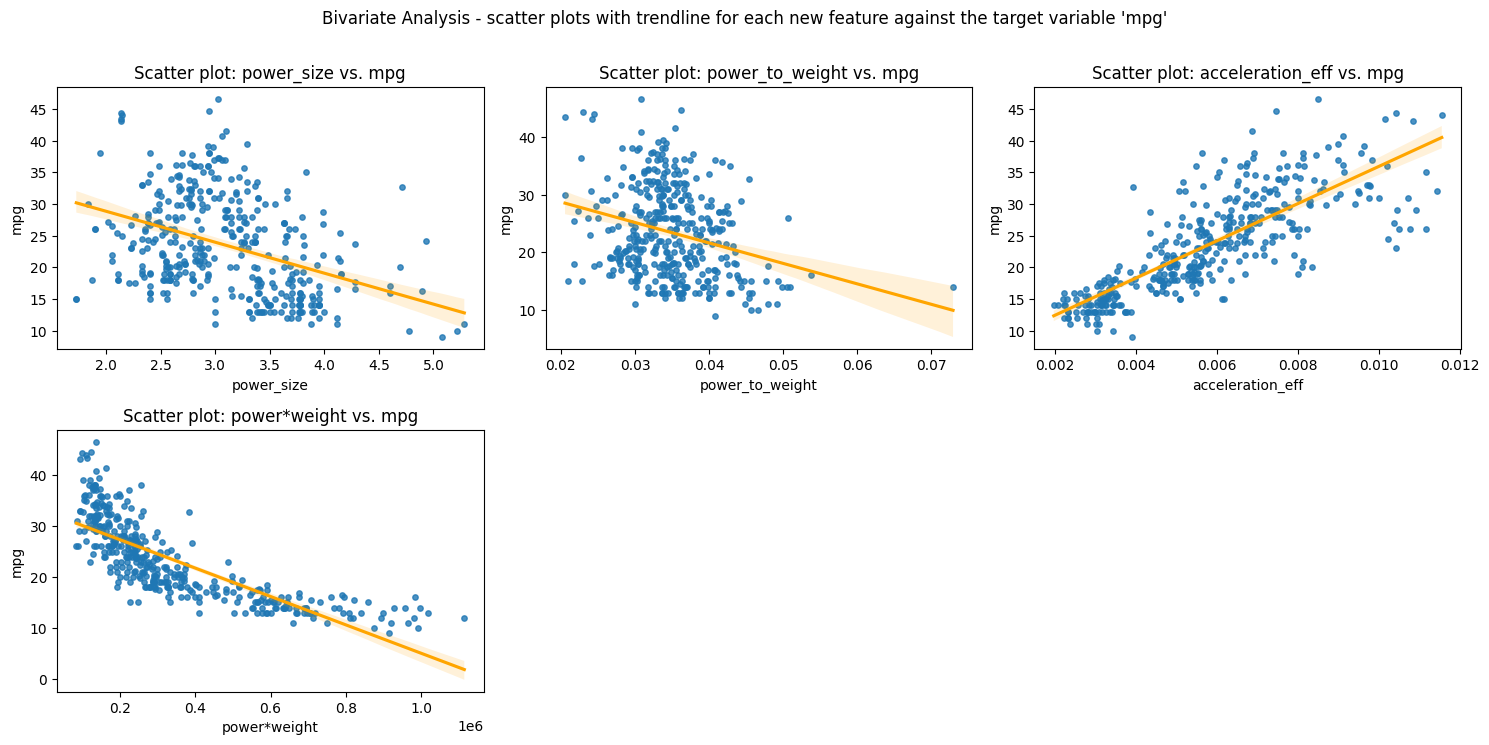

In [21]:
# Plotting Scatter plots with trendlines for numerical features against the target variable (mpg)
plt.figure(figsize=(15, 10))
numerical_features = ['power_size', 'power_to_weight', 'acceleration_eff','power*weight']
for i, feature in enumerate(numerical_features[0:], 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=feature, y='mpg', data=df, scatter_kws={'s': 15}, line_kws={'color': 'orange'})
    plt.title(f'Scatter plot: {feature} vs. mpg')

plt.tight_layout()
plt.suptitle("Bivariate Analysis - scatter plots with trendline for each new feature against the target variable 'mpg'", y=1.04)
plt.show()

In [22]:
df_car_name_excluded = df.drop(columns=['car name'])
df2 = df_car_name_excluded.copy()
correlation_matrix = df_car_name_excluded.corr()

In [23]:
df_car_name_excluded

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,power_size,power_to_weight,power*weight,acceleration_eff
0,18.00,8,307.00,130.00,3504,12.00,70,1,3.39,0.04,455520.00,0.00
1,15.00,8,350.00,165.00,3693,11.50,70,1,3.77,0.04,609345.00,0.00
2,18.00,8,318.00,150.00,3436,11.00,70,1,3.77,0.04,515400.00,0.00
3,16.00,8,304.00,150.00,3433,12.00,70,1,3.95,0.04,514950.00,0.00
4,17.00,8,302.00,140.00,3449,10.50,70,1,3.71,0.04,482860.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.00,4,140.00,86.00,2790,15.60,82,1,2.46,0.03,239940.00,0.01
394,44.00,4,97.00,52.00,2130,24.60,82,2,2.14,0.02,110760.00,0.01
395,32.00,4,135.00,84.00,2295,11.60,82,1,2.49,0.04,192780.00,0.01
396,28.00,4,120.00,79.00,2625,18.60,82,1,2.63,0.03,207375.00,0.01


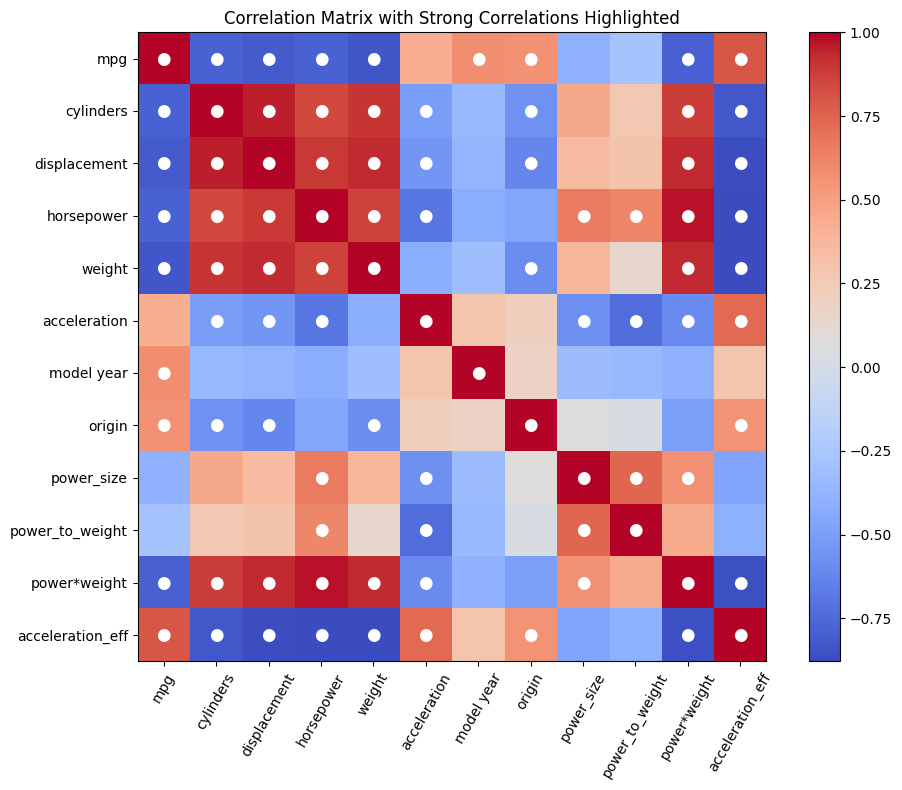

In [24]:
# Highlighting strong correlations (absolute value above 0.5)
threshold = 0.5
strong_correlations = abs(correlation_matrix) > threshold

# Creating heatmap with highlighted strong correlations
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=60)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Adding markers for strong correlations
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if strong_correlations.iloc[i, j]:
            plt.text(j, i, "●", ha="center", va="center", fontsize=12, color="white")

plt.title("Correlation Matrix with Strong Correlations Highlighted")
plt.tight_layout()
plt.show()

# 6. Data Splitting

Splitting Data into Training and Validation/Test Sets (70/30)

In [25]:
# Assuming df2 contains your features and 'mpg' is the target variable
X = df2.drop('mpg', axis=1)
y = df2['mpg']
# Splitting the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.65, random_state=123)

Further Splitting Validation and Test Sets (20/10)

In [26]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=123)

Visualizing feature distributions across sets

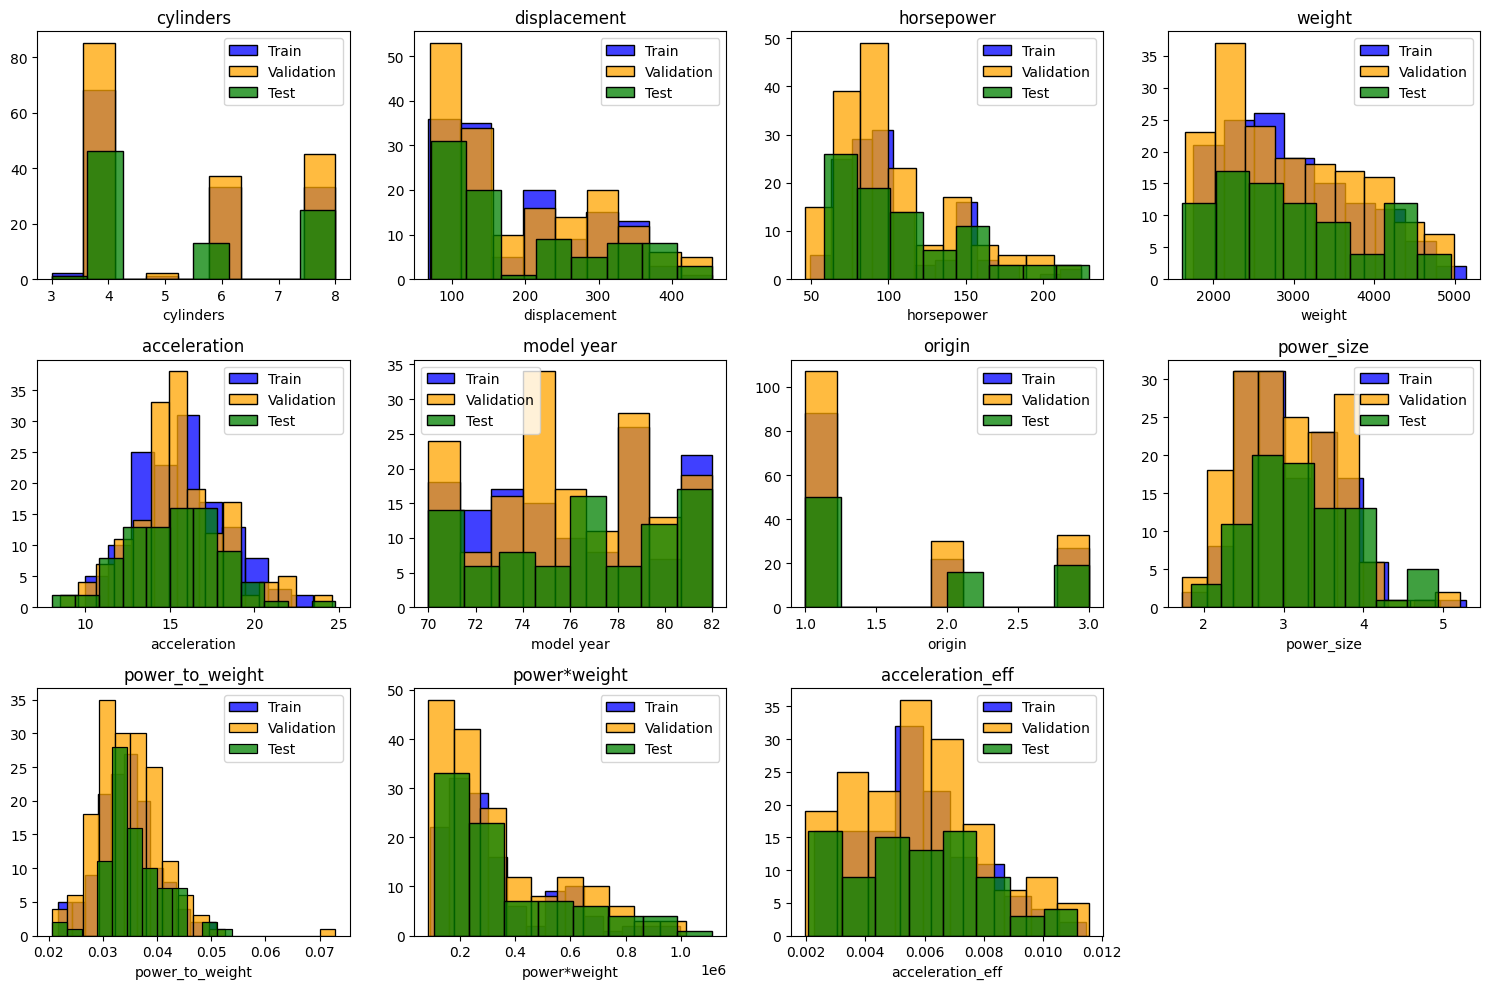

In [27]:
# Assuming train_data, val_data, and test_data are your datasets
# Each dataset should have 11 features

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of feature names (replace with your actual feature names)

# Iterate through features and plot their distributions
for i, feature in enumerate(X.columns):
    ax = axes[i]
    
    # Plot distribution for train set
    sns.histplot(X_train[feature], kde=False, color='blue', ax=ax, label='Train')
    
    # Plot distribution for validation set
    sns.histplot(X_val[feature], kde=False, color='orange', ax=ax, label='Validation')
    
    # Plot distribution for test set
    sns.histplot(X_test[feature], kde=False, color='green', ax=ax, label='Test')
    
    # Set plot title
    ax.set_title(feature)
    
    # Remove y-axis labels to save space
    ax.set_ylabel('')
    
    # Show legend for each subplot
    ax.legend()

# Remove the 12th subplot (index 11) as you requested
fig.delaxes(axes[-1])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

Visualizing mpg distribution across sets

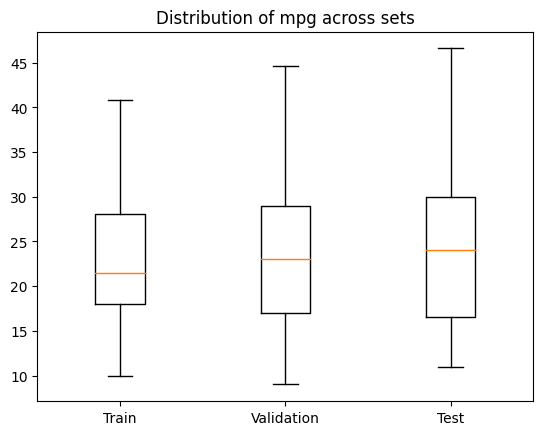

In [28]:
plt.boxplot([y_train, y_val, y_test], labels=['Train', 'Validation', 'Test'])
plt.title("Distribution of mpg across sets")
plt.show()

# 7. Model Selection and Training

Early model tests with lazy regressor.

In [35]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_temp, y_train, y_temp)

100%|██████████| 41/41 [00:02<00:00, 19.60it/s]


In [30]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.84,0.85,3.14,0.17
GradientBoostingRegressor,0.84,0.85,3.17,0.14
AdaBoostRegressor,0.84,0.84,3.21,0.10
PoissonRegressor,0.84,0.84,3.22,0.01
RandomForestRegressor,0.83,0.84,3.30,0.27
HistGradientBoostingRegressor,0.83,0.83,3.31,0.08
XGBRegressor,0.83,0.83,3.32,0.08
LassoCV,0.83,0.83,3.32,0.12
LassoLarsCV,0.83,0.83,3.32,0.03


In [31]:
# Define evaluation metrics function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates a model and returns performance metrics.

    Args:
        model: Scikit-learn model object.
        X_train: Training features.
        X_test: Test features.
        y_train: Training labels.
        y_test: Test labels.

    Returns:
        A dictionary containing training and test scores for selected metrics.
    """
    # Train the model
    model.fit(X_train, y_train)

    # Calculate predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate performance metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    # Return results
    return {
        "Model": model_name,
        "Train MSE": train_mse,
        "Train R^2": train_r2,
        "Test MSE": test_mse,
        "Test R^2": test_r2
    }

In [34]:
# Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": GridSearchCV(Ridge(), {'alpha': [0.1, 1, 10]}, cv=5),
    "Lasso": GridSearchCV(Lasso(), {'alpha': [0.1, 1, 10]}, cv=5),
    "ElasticNet": GridSearchCV(ElasticNet(), {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}, cv=5),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100),
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=100),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5)
}

# Evaluate each model using your validation set for cross-validation
results = []
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_val, y_val, cv=5, scoring='r2')  # Use validation set for CV
    cv_mean_r2 = cv_scores.mean()
    model_result = evaluate_model(model, X_train, X_test, y_train, y_test)

    model_result["CV Mean R^2"] = cv_mean_r2
    results.append(model_result)

# Create and format results table
results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)
results_df

,Train MSE,Train R^2,Test MSE,Test R^2,CV Mean R^2
Model,,,,,
LinearRegression,5.69,0.89,9.07,0.87,0.76
Ridge,5.76,0.89,8.97,0.87,0.78
Lasso,5.82,0.88,8.96,0.87,0.78
ElasticNet,6.01,0.88,8.79,0.87,0.78
RandomForestRegressor,0.95,0.98,6.92,0.90,0.77
GradientBoostingRegressor,0.33,0.99,7.22,0.89,0.74
KNeighborsRegressor,11.53,0.77,13.81,0.80,0.58


### Metrics
* Train MSE: Mean Squared Error on the training data. Lower values indicate better performance on the training data.

* Train R^2: R-squared on the training data. This is a metric that measures the proportion of variance in the target variable (mpg) explained by the model. Higher values indicate better    performance on the training data.

* Test MSE: Mean Squared Error on the test data. This is a more important metric than the training MSE, as it reflects how well the model generalizes to unseen data. Lower values indicate better generalization performance.

* Test R^2: R-squared on the test data. This metric indicates the proportion of variance in the target variable (mpg) explained by the model on unseen data. Higher values indicate better   generalization performance.

* CV Mean R^2: This metric is likely the average R-squared value obtained from cross-validation. Cross-validation is a technique used to estimate the model's generalization performance     by splitting the data into multiple folds, training on one fold and testing on the remaining folds, and repeating this process for all folds.folds.

### Model Performance
*  ##### Linear Regression:
   It has a relatively high Train R^2 but a lower Test R^2, suggesting that the model might be overfitting to the training data and not generalizing well to unseen data.

*  ##### Ridge, Lasso, ElasticNet:
   These are regularization techniques that introduce penalties to the model complexity, which can help to reduce overfitting. They achieve comparable performance to Linear Regression in    terms of Test R^2, suggesting that they might address overfitting to some extent while maintaining reasonable accuracy.

*  ##### Random ForestRegressor:
   This ensemble model achieves the highest Test R^2 among all models, indicating good generalization performance. However, it comes at the cost of interpretability, as understanding how    this model arrives at its predictions can be challenging.

*  ##### GradientBoostingRegressor:
   This model also achieves a high Test R^2, suggesting good generalization. Similar to Random Forest, it can be less interpretable than simpler models like Linear Regression.

*  ##### KNeighborsRegressor:
   This model has the lowest Test R^2 among all models, indicating the worst performance in generalizing to unseen data.o unseen data.een data.ata.

### Key Takeaways

* While Random ForestRegressor and GradientBoostingRegressor achieve the best performance in terms of generalizability, they come at the cost of interpretability.
* Linear Regression provides a clear understanding of the relationships between features and the target variable but might not generalize well to unseen data.
* Regularization techniques like Ridge, Lasso, and ElasticNet can help improve the generalizability of Linear Regression to some extent while maintaining reasonable accuracy and some level of interpretability.